# Most Used Tacticts in the Top 5 European’s League (1/2)

### Load the Dataset

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_games = pd.read_csv('./Dataset/games.csv')
df_club = pd.read_csv('./Dataset/clubs.csv')

### Filtering Data

To kick things off, we need to reorganize the `df_games` dataframe, which contains the results and details of every match since 2012.

Our analysis focuses on the **2023-2024 season** and Europe’s **Big Five Leagues**. The first step is to filter our dataset accordingly.

In [2]:
list_big_five_championship = ['FR1', 'ES1', 'IT1', 'GB1', 'L1'] #Code Id Big Five Leagues

start_season = '2023-08-01'
end_season = '2024-07-01'

df_games["date"] = pd.to_datetime(df_games["date"])
df_games_big_five = df_games[df_games['competition_id'].isin(list_big_five_championship)]
df_games_big_five = df_games_big_five[(df_games_big_five["date"]>=start_season) &
                                      (df_games_big_five["date"]<=end_season)]

In [4]:
df_games_big_five.head(5)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
2619,4087929,GB1,2023,1. Matchday,2023-08-12,350.0,873.0,0.0,1.0,14.0,...,Bramall Lane,31194.0,John Brooks,https://www.transfermarkt.co.uk/sheffield-unit...,3-4-3,4-2-3-1,Sheffield United,Crystal Palace Football Club,0:1,domestic_league
2620,4087952,GB1,2023,3. Matchday,2023-08-27,762.0,31.0,1.0,2.0,13.0,...,St James' Park,52214.0,John Brooks,https://www.transfermarkt.co.uk/newcastle-unit...,4-3-3 Attacking,4-3-3 Attacking,Newcastle United Football Club,Liverpool Football Club,1:2,domestic_league
2621,4087962,GB1,2023,4. Matchday,2023-09-02,281.0,931.0,5.0,1.0,1.0,...,Etihad Stadium,52899.0,Michael Oliver,https://www.transfermarkt.co.uk/manchester-cit...,4-2-3-1,4-3-3 Attacking,Manchester City Football Club,Fulham Football Club,5:1,domestic_league
2622,4087965,GB1,2023,5. Matchday,2023-09-16,405.0,873.0,3.0,1.0,7.0,...,Villa Park,40809.0,Darren England,https://www.transfermarkt.co.uk/aston-villa_cr...,4-2-3-1,4-4-1-1,Aston Villa Football Club,Crystal Palace Football Club,3:1,domestic_league
2631,4094596,FR1,2023,3. Matchday,2023-08-26,583.0,826.0,3.0,1.0,8.0,...,Parc des Princes,47000.0,François Letexier,https://www.transfermarkt.co.uk/paris-saint-ge...,4-3-3 Attacking,3-4-2-1,Paris Saint-Germain Football Club,Racing Club de Lens,3:1,domestic_league


Next, we’ll continue working on our dataframe. For our analysis, we only need two columns: “home_club_formation” and “away_club_formation”. These two columns will be merged into a single column named “formation”. \
Additionally, we will standardize the formations by ignoring specific variations, such as treating a 4-3-3 Attacking the same as a standard 4-3-3, or a 3-5-2 Flat the same as a basic 3-5-2.

In [5]:
tactics = pd.concat([df_games_big_five["home_club_formation"], df_games_big_five["away_club_formation"]]).reset_index(drop=True)
tactics = tactics.str.split().str[0]

df_tactics = pd.DataFrame({"formation" : tactics})

n_match = len(df_tactics)
df_tactics = pd.DataFrame({"Times Used This Season" :  df_tactics["formation"].value_counts(),
                           "% Usage This Season" : (df_tactics["formation"].value_counts()/n_match)*100})

In [6]:
df_tactics.head(10)

,Times Used This Season,% Usage This Season
formation,,
4-2-3-1,1027,29.309361
4-3-3,687,19.606164
3-4-2-1,398,11.358447
4-4-2,381,10.873288
3-5-2,376,10.730594
3-4-3,176,5.022831
3-4-1-2,101,2.882420
5-3-2,66,1.883562
4-1-4-1,64,1.826484


### Visualization

C:\Users\Florian\AppData\Local\Temp\ipykernel_7336\99021914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


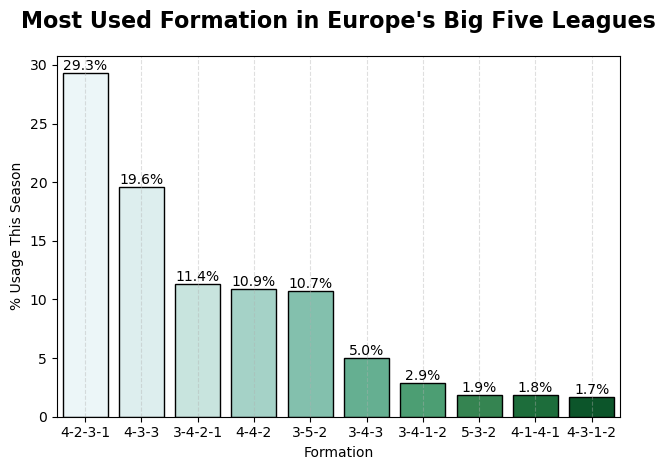

In [7]:
df_rank_tactics = df_tactics.head(10)
palette = sns.color_palette("BuGn", len(df_rank_tactics))

plt.Figure(figsize=(12,8))
bar = sns.barplot(
    data=df_rank_tactics,  
    x="formation", 
    y="% Usage This Season",
    palette=palette,
    edgecolor="black"
)
for i, bar_container in enumerate(bar.patches):
    height = bar_container.get_height()
    plt.text(
        bar_container.get_x() + bar_container.get_width() / 2,  
        height,                                                
        f'{height:.1f}%',                                      
        ha='center',                                           
        va='bottom',                                           
        fontsize=10                                            
    )

plt.xlabel("Formation")
plt.title("Most Used Formation in Europe's Big Five Leagues", fontsize=16, weight="bold", pad=20)  
plt.grid(axis='x', linestyle='--', alpha=0.4)  

plt.tight_layout()  
plt.show() 

The 4-2-3-1 was the most popular formation during the season 2023-2024 , and honestly, it’s not hard to see why. This tactic strikes the perfect balance between defense and attack

Plenty of top coaches use it ! We can talk about the french squad of **Didier Deschamps and his** victory at the 2018 World Cup or about  **Joachim Löw’s German team**, who dominated their way to a World Cup win in 2014 using the same tactic.

But the real question is: does the 4-2-3-1 really perform that well? We’ll dive into the details in the next post—stay tuned!